In [20]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## load Iris data set

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
print("here, we only use setosa and versicolor ")
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(100)

target_names: ['setosa' 'versicolor' 'virginica']
here, we only use setosa and versicolor 


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## Spilt data to training and testing set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.2, random_state=0)

In [5]:
x_train

,sepal length (cm),petal length (cm)
43,5.0,1.6
62,6.0,4.0
3,4.6,1.5
71,6.1,4.0
45,4.8,1.4
...,...,...
96,5.7,4.2
67,5.8,4.1
64,5.6,3.6
47,4.6,1.4


In [6]:
y_train

,target
43,0
62,1
3,0
71,1
45,0
...,...
96,1
67,1
64,1
47,0


# check data set dimension

In [7]:
print("The shape of train data x is :",x_train.shape)
print("The shape of train data y is :",y_train.shape)

The shape of train data x is : (80, 2)
The shape of train data y is : (80, 1)


In [8]:
print("The shape of test data x is :",x_test.shape)
print("The shape of test data y is :",y_test.shape)

The shape of test data x is : (20, 2)
The shape of test data y is : (20, 1)


## Before training, we have to normalize the data

* The standard score of a sample x is calculated as: z = (x - u) / s
* fit() : Compute the mean and std to be used for later scaling
* transform : Perform standardization by centering and scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [10]:
x_train_norm[:10]

array([[-0.78865971, -0.88198307],
       [ 0.82910379,  0.79299961],
       [-1.43576511, -0.95177401],
       [ 0.99088014,  0.79299961],
       [-1.11221241, -1.02156496],
       [-0.30333066, -0.95177401],
       [-1.43576511, -1.02156496],
       [ 0.34377474,  0.86279056],
       [ 0.50555109,  0.72320867],
       [ 2.1233146 ,  1.35132718]])

In [11]:
y_train['target'].values

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

## Train the LogisticRegression

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
model = Perceptron()

In [14]:
model.fit(x_train_norm,y_train['target'].values);

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

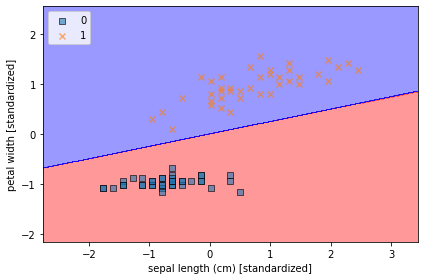

In [16]:
plot_decision_regions(x_train_norm, y_train['target'].values, classifier=model)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Prediction

In [17]:
pred = model.predict(x_test_norm)
print("prediction: ", pred)
print("ground truth :", y_test['target'].values)

prediction:  [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
ground truth : [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [18]:
e = 0
for i, j in enumerate(pred):
    if j!= y_test['target'].values[i]:
        e+=1
print("error:", e)

error: 0
